# Google's stock market  price prediction using LSTM 

can we predict the closing prices of stocks 30 days into the future ? 

steps:

1) We will collect the stock Data -GOOGLE 


2) Preprocecess the Data- Train and Test 


3) Predict the test data 


4) Predict the future 30 days and plot the output 

In [1]:
#importing all the necessary libraries 

import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
import seaborn as sns 
import keras 

Using TensorFlow backend.


In [2]:
# collecting the data 
import pandas_datareader as pdr

In [4]:
df=pdr.get_data_tiingo('GOOG',api_key='98322792914529b2e7efe775d12e7d412429f0bf')

In [5]:
df.to_csv("google.csv")

In [6]:
data=pd.read_csv("google.csv")

In [8]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2015-08-03 00:00:00+00:00,631.21,633.0556,625.34,625.34,1304511,631.21,633.0556,625.34,625.34,1304511,0.0,1.0
1,GOOG,2015-08-04 00:00:00+00:00,629.25,634.8100,627.16,628.42,1490881,629.25,634.8100,627.16,628.42,1490881,0.0,1.0
2,GOOG,2015-08-05 00:00:00+00:00,643.78,647.8600,633.16,634.33,2008659,643.78,647.8600,633.16,634.33,2008659,0.0,1.0
3,GOOG,2015-08-06 00:00:00+00:00,642.68,645.3790,632.25,645.00,1572600,642.68,645.3790,632.25,645.00,1572600,0.0,1.0
4,GOOG,2015-08-07 00:00:00+00:00,635.30,642.6800,629.71,640.23,1403865,635.30,642.6800,629.71,640.23,1403865,0.0,1.0


In [9]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOG,2020-07-23 00:00:00+00:00,1515.68,1571.8700,1507.3918,1566.97,1627634,1515.68,1571.8700,1507.3918,1566.97,1627634,0.0,1.0
1253,GOOG,2020-07-24 00:00:00+00:00,1511.87,1517.6362,1488.4000,1498.93,1544404,1511.87,1517.6362,1488.4000,1498.93,1544404,0.0,1.0
1254,GOOG,2020-07-27 00:00:00+00:00,1530.20,1540.9700,1515.2100,1515.60,1245980,1530.20,1540.9700,1515.2100,1515.60,1245980,0.0,1.0
1255,GOOG,2020-07-28 00:00:00+00:00,1500.34,1526.4800,1497.6600,1525.18,1702174,1500.34,1526.4800,1497.6600,1525.18,1702174,0.0,1.0
1256,GOOG,2020-07-29 00:00:00+00:00,1522.02,1531.2522,1501.3300,1506.32,1106534,1522.02,1531.2522,1501.3300,1506.32,1106534,0.0,1.0


In [10]:
data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [11]:
# resetting the index and creating variable with all the close columns 
df1=data.reset_index()['close']

In [13]:
df1.shape

(1257,)

In [14]:
df1.head()

0    631.21
1    629.25
2    643.78
3    642.68
4    635.30
Name: close, dtype: float64

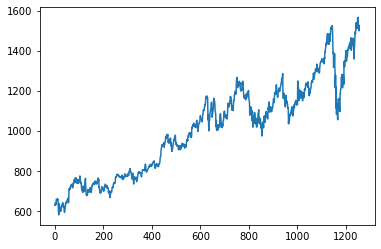

In [16]:
#plotting df1 
plt.plot(df1);

## LSTM is very sensitive to the scale of the data 

Hence to bring all the values to one scale , we're using MinMaxScaler here 


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1.shape

(1257, 1)

In [20]:
print(df1)

[[0.04982614]
 [0.04783918]
 [0.06256906]
 ...
 [0.96118326]
 [0.93091248]
 [0.95289073]]


Whenever we're dealing with Time series data, do the train-test split in a different way , i.e. based on the date (the dataframe should be ordered) . Do not use cross validation or random seed ! (those work well with data sets which dont have a date attached to them aka non-time series data )

In [21]:
#splitting the data into train and test split 
train_size=int(len(df1)*0.7)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [22]:
train_size,test_size

(879, 378)

In [25]:
# create an array of values into dataset matrix 
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step=200
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)



In [28]:
print(x_train)

[[0.04982614 0.04783918 0.06256906 ... 0.13054145 0.13627931 0.12587817]
 [0.04783918 0.06256906 0.06145393 ... 0.13627931 0.12587817 0.12628367]
 [0.06256906 0.06145393 0.05397241 ... 0.12587817 0.12628367 0.11988686]
 ...
 [0.43935201 0.45576473 0.44393419 ... 0.5233012  0.49517959 0.50029906]
 [0.45576473 0.44393419 0.4566467  ... 0.49517959 0.50029906 0.49860608]
 [0.44393419 0.4566467  0.45336212 ... 0.50029906 0.49860608 0.51593119]]


In [29]:
print(x_train.shape)

(678, 200)


In [30]:
# convert this input from 2D to 3D to be [samples, time stamps, features] which is required for LSTM 
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

## Create the stacked LSTM model 

In [31]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(200,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 200, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 200, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=150,batch_size=64,verbose=1)

Train on 678 samples, validate on 177 samples
Epoch 1/150
678/678 [==============================] - 38s 56ms/sample - loss: 0.0555 - val_loss: 0.0405
Epoch 2/150
678/678 [==============================] - 24s 36ms/sample - loss: 0.0078 - val_loss: 0.0131
Epoch 3/150
678/678 [==============================] - 24s 36ms/sample - loss: 0.0041 - val_loss: 0.0379
Epoch 4/150
678/678 [==============================] - 24s 36ms/sample - loss: 0.0028 - val_loss: 0.0113
Epoch 5/150
678/678 [==============================] - 24s 36ms/sample - loss: 0.0017 - val_loss: 0.0093
Epoch 6/150
678/678 [==============================] - 25s 36ms/sample - loss: 0.0013 - val_loss: 0.0094
Epoch 7/150
678/678 [==============================] - 25s 36ms/sample - loss: 0.0013 - val_loss: 0.0093
Epoch 8/150
678/678 [==============================] - 24s 36ms/sample - loss: 0.0012 - val_loss: 0.0079
Epoch 9/150
678/678 [==============================] - 25s 36ms/sample - loss: 0.0013 - val_loss: 0.0083
Epoch 10/

678/678 [==============================] - 24s 36ms/sample - loss: 6.6863e-04 - val_loss: 0.0035
Epoch 77/150
678/678 [==============================] - 24s 36ms/sample - loss: 6.7350e-04 - val_loss: 0.0053
Epoch 78/150
678/678 [==============================] - 24s 36ms/sample - loss: 7.2723e-04 - val_loss: 0.0024
Epoch 79/150
678/678 [==============================] - 24s 36ms/sample - loss: 7.0840e-04 - val_loss: 0.0052
Epoch 80/150
678/678 [==============================] - 24s 36ms/sample - loss: 6.4440e-04 - val_loss: 0.0029
Epoch 81/150
678/678 [==============================] - 24s 36ms/sample - loss: 6.1903e-04 - val_loss: 0.0054
Epoch 82/150
678/678 [==============================] - 25s 36ms/sample - loss: 6.8692e-04 - val_loss: 0.0022
Epoch 83/150
678/678 [==============================] - 25s 36ms/sample - loss: 6.4843e-04 - val_loss: 0.0065
Epoch 84/150
678/678 [==============================] - 24s 36ms/sample - loss: 6.6309e-04 - val_loss: 0.0042
Epoch 85/150
678/678 [=

678/678 [==============================] - 24s 36ms/sample - loss: 3.4090e-04 - val_loss: 0.0021


In [40]:
 ## Doing the prediction and checking the perfomance metrics 
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [41]:
## Transform back to original form 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
#Calculate RMSE perfomance metrics 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

958.7779418035173

In [45]:
## Test data RMSE 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

1341.7848314083108

In [46]:
##Predict 30 days into the future 
len(test_data)

378

In [47]:
x_input=test_data[178:].reshape(1,-1)
x_input.shape

(1, 200)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.6438165911417942,
 0.6700424764048133,
 0.6706811431120304,
 0.6802408685867217,
 0.6725565929665561,
 0.6732256723741169,
 0.6698295875024077,
 0.686384234056142,
 0.6882698214774491,
 0.6924667741248748,
 0.7176789027097715,
 0.6899222448627879,
 0.6885739484808856,
 0.6873777156007014,
 0.7011952191235059,
 0.7190677493587988,
 0.7197368287663596,
 0.7195036647303913,
 0.7367983536591546,
 0.7393428829212411,
 0.7269953265817138,
 0.7265999614772461,
 0.7257889561347485,
 0.7394341210222722,
 0.763166164857111,
 0.7488012327281207,
 0.7434891477347608,
 0.7309084273592653,
 0.7291850410064576,
 0.7230923633709437,
 0.7345985016676299,
 0.7415528724795474,
 0.7409851687397991,
 0.7328447026144785,
 0.7175978021755219,
 0.7230315379702564,
 0.7486390316596211,
 0.7563334448465681,
 0.7689952657563132,
 0.7719757103899921,
 0.7730908427359265,
 0.7734557951400506,
 0.7787780177001916,
 0.7763044514055736,
 0.7898279654917227,
 0.7836947375890838,
 0.7811603458937785,
 0.784627393732

In [52]:
# demonstrate the prediction for the next 30 days 
lst_output=[]
n_steps=200
i=0
while(i<=30):
    if(len(temp_input)>200):
        #print temp_input
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.7345985  0.74155287 0.74098517 0.7328447  0.7175978  0.72303154
 0.74863903 0.75633344 0.76899527 0.77197571 0.77309084 0.7734558
 0.77877802 0.77630445 0.78982797 0.78369474 0.78116035 0.78462739
 0.77808866 0.77732835 0.77197571 0.78904737 0.7804203  0.76445364
 0.76534574 0.79611326 0.78931095 0.82332249 0.82244052 0.83357157
 0.84929493 0.85933112 0.86896181 0.86049694 0.8689314  0.88160336
 0.91068804 0.9147532  0.91632452 0.91703415 0.89681985 0.86355849
 0.88247519 0.88862869 0.88580031 0.86389303 0.91631439 0.87690966
 0.87808562 0.90647081 0.90951208 0.93936721 0.93947873 0.94908914
 0.94542948 0.95159312 0.9505084  0.95762497 0.94896749 0.91547297
 0.85107914 0.81748325 0.82227832 0.74615533 0.76768752 0.81815233
 0.76977586 0.8155267  0.7471184  0.7262046  0.64221486 0.7079367
 0.64206279 0.54018025 0.64644222 0.50917957 0.54513752 0.52182111
 0.54056547 0.49700435 0.48108837 0.55999919 0.52758939 0.58766461
 0.53592247 0.57252922 0.58873919 0.53076245 0.54619

3 day output [[0.7337824]]
4 day input [0.7175978  0.72303154 0.74863903 0.75633344 0.76899527 0.77197571
 0.77309084 0.7734558  0.77877802 0.77630445 0.78982797 0.78369474
 0.78116035 0.78462739 0.77808866 0.77732835 0.77197571 0.78904737
 0.7804203  0.76445364 0.76534574 0.79611326 0.78931095 0.82332249
 0.82244052 0.83357157 0.84929493 0.85933112 0.86896181 0.86049694
 0.8689314  0.88160336 0.91068804 0.9147532  0.91632452 0.91703415
 0.89681985 0.86355849 0.88247519 0.88862869 0.88580031 0.86389303
 0.91631439 0.87690966 0.87808562 0.90647081 0.90951208 0.93936721
 0.93947873 0.94908914 0.94542948 0.95159312 0.9505084  0.95762497
 0.94896749 0.91547297 0.85107914 0.81748325 0.82227832 0.74615533
 0.76768752 0.81815233 0.76977586 0.8155267  0.7471184  0.7262046
 0.64221486 0.7079367  0.64206279 0.54018025 0.64644222 0.50917957
 0.54513752 0.52182111 0.54056547 0.49700435 0.48108837 0.55999919
 0.52758939 0.58766461 0.53592247 0.57252922 0.58873919 0.53076245
 0.54619182 0.52291597 0

7 day output [[0.6974466]]
8 day input [0.76899527 0.77197571 0.77309084 0.7734558  0.77877802 0.77630445
 0.78982797 0.78369474 0.78116035 0.78462739 0.77808866 0.77732835
 0.77197571 0.78904737 0.7804203  0.76445364 0.76534574 0.79611326
 0.78931095 0.82332249 0.82244052 0.83357157 0.84929493 0.85933112
 0.86896181 0.86049694 0.8689314  0.88160336 0.91068804 0.9147532
 0.91632452 0.91703415 0.89681985 0.86355849 0.88247519 0.88862869
 0.88580031 0.86389303 0.91631439 0.87690966 0.87808562 0.90647081
 0.90951208 0.93936721 0.93947873 0.94908914 0.94542948 0.95159312
 0.9505084  0.95762497 0.94896749 0.91547297 0.85107914 0.81748325
 0.82227832 0.74615533 0.76768752 0.81815233 0.76977586 0.8155267
 0.7471184  0.7262046  0.64221486 0.7079367  0.64206279 0.54018025
 0.64644222 0.50917957 0.54513752 0.52182111 0.54056547 0.49700435
 0.48108837 0.55999919 0.52758939 0.58766461 0.53592247 0.57252922
 0.58873919 0.53076245 0.54619182 0.52291597 0.61318086 0.61276522
 0.63686222 0.63804832 0.

11 day output [[0.65740734]]
12 day input [0.77877802 0.77630445 0.78982797 0.78369474 0.78116035 0.78462739
 0.77808866 0.77732835 0.77197571 0.78904737 0.7804203  0.76445364
 0.76534574 0.79611326 0.78931095 0.82332249 0.82244052 0.83357157
 0.84929493 0.85933112 0.86896181 0.86049694 0.8689314  0.88160336
 0.91068804 0.9147532  0.91632452 0.91703415 0.89681985 0.86355849
 0.88247519 0.88862869 0.88580031 0.86389303 0.91631439 0.87690966
 0.87808562 0.90647081 0.90951208 0.93936721 0.93947873 0.94908914
 0.94542948 0.95159312 0.9505084  0.95762497 0.94896749 0.91547297
 0.85107914 0.81748325 0.82227832 0.74615533 0.76768752 0.81815233
 0.76977586 0.8155267  0.7471184  0.7262046  0.64221486 0.7079367
 0.64206279 0.54018025 0.64644222 0.50917957 0.54513752 0.52182111
 0.54056547 0.49700435 0.48108837 0.55999919 0.52758939 0.58766461
 0.53592247 0.57252922 0.58873919 0.53076245 0.54619182 0.52291597
 0.61318086 0.61276522 0.63686222 0.63804832 0.64424237 0.69662318
 0.68977018 0.6907839

15 day output [[0.61386955]]
16 day input [0.78116035 0.78462739 0.77808866 0.77732835 0.77197571 0.78904737
 0.7804203  0.76445364 0.76534574 0.79611326 0.78931095 0.82332249
 0.82244052 0.83357157 0.84929493 0.85933112 0.86896181 0.86049694
 0.8689314  0.88160336 0.91068804 0.9147532  0.91632452 0.91703415
 0.89681985 0.86355849 0.88247519 0.88862869 0.88580031 0.86389303
 0.91631439 0.87690966 0.87808562 0.90647081 0.90951208 0.93936721
 0.93947873 0.94908914 0.94542948 0.95159312 0.9505084  0.95762497
 0.94896749 0.91547297 0.85107914 0.81748325 0.82227832 0.74615533
 0.76768752 0.81815233 0.76977586 0.8155267  0.7471184  0.7262046
 0.64221486 0.7079367  0.64206279 0.54018025 0.64644222 0.50917957
 0.54513752 0.52182111 0.54056547 0.49700435 0.48108837 0.55999919
 0.52758939 0.58766461 0.53592247 0.57252922 0.58873919 0.53076245
 0.54619182 0.52291597 0.61318086 0.61276522 0.63686222 0.63804832
 0.64424237 0.69662318 0.68977018 0.69078394 0.71083605 0.69396713
 0.64300559 0.6905203

19 day output [[0.567672]]
20 day input [0.77197571 0.78904737 0.7804203  0.76445364 0.76534574 0.79611326
 0.78931095 0.82332249 0.82244052 0.83357157 0.84929493 0.85933112
 0.86896181 0.86049694 0.8689314  0.88160336 0.91068804 0.9147532
 0.91632452 0.91703415 0.89681985 0.86355849 0.88247519 0.88862869
 0.88580031 0.86389303 0.91631439 0.87690966 0.87808562 0.90647081
 0.90951208 0.93936721 0.93947873 0.94908914 0.94542948 0.95159312
 0.9505084  0.95762497 0.94896749 0.91547297 0.85107914 0.81748325
 0.82227832 0.74615533 0.76768752 0.81815233 0.76977586 0.8155267
 0.7471184  0.7262046  0.64221486 0.7079367  0.64206279 0.54018025
 0.64644222 0.50917957 0.54513752 0.52182111 0.54056547 0.49700435
 0.48108837 0.55999919 0.52758939 0.58766461 0.53592247 0.57252922
 0.58873919 0.53076245 0.54619182 0.52291597 0.61318086 0.61276522
 0.63686222 0.63804832 0.64424237 0.69662318 0.68977018 0.69078394
 0.71083605 0.69396713 0.64300559 0.69052036 0.70380057 0.70684184
 0.70336466 0.66057399 0

23 day output [[0.52034473]]
24 day input [0.76534574 0.79611326 0.78931095 0.82332249 0.82244052 0.83357157
 0.84929493 0.85933112 0.86896181 0.86049694 0.8689314  0.88160336
 0.91068804 0.9147532  0.91632452 0.91703415 0.89681985 0.86355849
 0.88247519 0.88862869 0.88580031 0.86389303 0.91631439 0.87690966
 0.87808562 0.90647081 0.90951208 0.93936721 0.93947873 0.94908914
 0.94542948 0.95159312 0.9505084  0.95762497 0.94896749 0.91547297
 0.85107914 0.81748325 0.82227832 0.74615533 0.76768752 0.81815233
 0.76977586 0.8155267  0.7471184  0.7262046  0.64221486 0.7079367
 0.64206279 0.54018025 0.64644222 0.50917957 0.54513752 0.52182111
 0.54056547 0.49700435 0.48108837 0.55999919 0.52758939 0.58766461
 0.53592247 0.57252922 0.58873919 0.53076245 0.54619182 0.52291597
 0.61318086 0.61276522 0.63686222 0.63804832 0.64424237 0.69662318
 0.68977018 0.69078394 0.71083605 0.69396713 0.64300559 0.69052036
 0.70380057 0.70684184 0.70336466 0.66057399 0.7698671  0.77714587
 0.74870999 0.7549851

27 day output [[0.47411114]]
28 day input [0.82244052 0.83357157 0.84929493 0.85933112 0.86896181 0.86049694
 0.8689314  0.88160336 0.91068804 0.9147532  0.91632452 0.91703415
 0.89681985 0.86355849 0.88247519 0.88862869 0.88580031 0.86389303
 0.91631439 0.87690966 0.87808562 0.90647081 0.90951208 0.93936721
 0.93947873 0.94908914 0.94542948 0.95159312 0.9505084  0.95762497
 0.94896749 0.91547297 0.85107914 0.81748325 0.82227832 0.74615533
 0.76768752 0.81815233 0.76977586 0.8155267  0.7471184  0.7262046
 0.64221486 0.7079367  0.64206279 0.54018025 0.64644222 0.50917957
 0.54513752 0.52182111 0.54056547 0.49700435 0.48108837 0.55999919
 0.52758939 0.58766461 0.53592247 0.57252922 0.58873919 0.53076245
 0.54619182 0.52291597 0.61318086 0.61276522 0.63686222 0.63804832
 0.64424237 0.69662318 0.68977018 0.69078394 0.71083605 0.69396713
 0.64300559 0.69052036 0.70380057 0.70684184 0.70336466 0.66057399
 0.7698671  0.77714587 0.74870999 0.75498515 0.77962957 0.77576716
 0.80137465 0.8174021

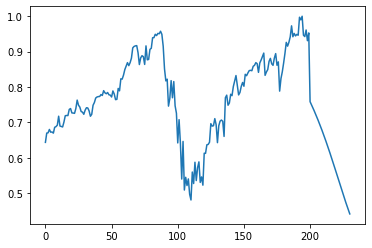

In [62]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3:])